In [1]:
import numpy as np
from matplotlib import pyplot as plt

$$log P(Y=1|X=\vec{x}_t) = \sigma (\vec{w}\cdot\vec{x}_t)$$<br>
$$This\ can\ be\ written\ in\ matrix\ form\ as\ follows:-$$<br>
$$P = \sigma \left(X\cdot\vec{w}\right)$$
$$Where\ P = \left[P(Y=1|X=\vec{x}_1), P(Y=1|X=\vec{x}_2), \ldots, P(Y=1|X=\vec{x}_T)\right]$$
$$X = [\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_T]$$

In [2]:
# Defining Logistic Regression model
class LogRegModel:
    def __init__(self, paramShape):
        self.weightVec = np.random.rand(paramShape)
        
    def Sigmoid(self, arr):
        return 1/(1 + np.exp(-arr))
        
    def LogLikelihood(self, bitmaps):
        return self.Sigmoid(np.dot(bitmaps, self.weightVec))

In [3]:
# Reading train data
# Giving label 0 to digit 3 and label 1 to digit 5
bitmap_train = []
label_train = []

with open('train3.txt', 'r') as f:
    bitmapLines = f.readlines()
    
    for bitmap in bitmapLines:
        bitmap_train.append(bitmap.replace(' \n', '').split(' '))
        label_train.append(0)
        
with open('train5.txt', 'r') as f:
    bitmapLines = f.readlines()
    
    for bitmap in bitmapLines:
        bitmap_train.append(bitmap.replace(' \n', '').split(' '))
        label_train.append(1)
        
bitmap_train = np.array(bitmap_train, dtype=float)
label_train = np.array(label_train, dtype=float)

Logistic regression is represented by, $${\cal L} = \sum_t \log P(y_t|\vec{x}_t)$$<br>
Gradient is represented by, $$\frac{\partial{\cal L}}{\partial \vec{w}_{i}}\ =\ \sum_{t} (y_{it}-p_{it})\,\vec{x}_t.$$<br>
Gradient can be written in matrix form as follows :-
$$\frac{\partial{\cal L}}{\partial \vec{w}_{i}} = (Y - P) \cdot X$$<br>
$$Where\ Y = \left[Y_1, Y_2, \ldots, Y_T)\right]$$
$$P = \left[P(Y=1|X=\vec{x}_1), P(Y=1|X=\vec{x}_2), \ldots, P(Y=1|X=\vec{x}_T)\right]$$
$$X = [\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_T]$$<br>
(Y - P) is a T dimensional row vector that represents difference between actual values and predicted values<br><br>
Gradient Ascent equation is as follows :-
$$\vec{w}\ \leftarrow\ \vec{w} + \eta\ \left[(Y - P) \cdot X\right]$$

In [4]:
# Initialize model and hyper parameters
model = LogRegModel(64)

iterations = 500
learning_rate = 0.2/len(label_train)
percentErrors = []
logLikelihoods = []
itrList = [x for x in range(1, iterations+1)]

# Gradient Ascent
for itr in range(1, iterations+1):
    # Compute predictions, percent error and log likelihood
    pLabelGivenBitmap = model.LogLikelihood(bitmap_train)
    percentErrors.append((np.sum((label_train != (pLabelGivenBitmap > 0.5).astype(int)).astype(int))/len(label_train))*100)
    logLikelihoods.append(np.sum(label_train*np.log(pLabelGivenBitmap) + (1-label_train)*np.log(1 - pLabelGivenBitmap)))
    
    if(itr==1 or itr%20==0):
        print("Iteration ", itr, "\t Log-likelihood = ", logLikelihoods[-1], "\t Percent error = ", percentErrors[-1])
    
    # weight update
    gradient = np.dot(label_train - pLabelGivenBitmap, bitmap_train)
    model.weightVec = model.weightVec + learning_rate*gradient

Iteration  1 	 Log-likelihood =  -10692.063404000208 	 Percent error =  50.0
Iteration  20 	 Log-likelihood =  -691.5208911931325 	 Percent error =  23.785714285714285
Iteration  40 	 Log-likelihood =  -452.05191034437803 	 Percent error =  12.571428571428573
Iteration  60 	 Log-likelihood =  -372.3563211344531 	 Percent error =  9.428571428571429
Iteration  80 	 Log-likelihood =  -331.3984558471569 	 Percent error =  8.428571428571429
Iteration  100 	 Log-likelihood =  -305.8497315711378 	 Percent error =  7.857142857142857
Iteration  120 	 Log-likelihood =  -288.1895047574516 	 Percent error =  7.357142857142857
Iteration  140 	 Log-likelihood =  -275.15600336893385 	 Percent error =  6.5
Iteration  160 	 Log-likelihood =  -265.07967976446673 	 Percent error =  6.071428571428571
Iteration  180 	 Log-likelihood =  -257.01243594078767 	 Percent error =  5.785714285714286
Iteration  200 	 Log-likelihood =  -250.37512132810883 	 Percent error =  5.642857142857142
Iteration  220 	 Log-lik

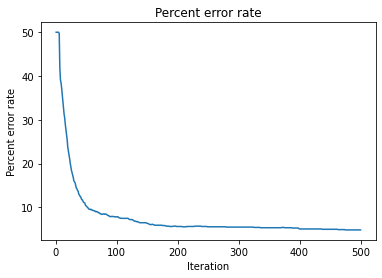

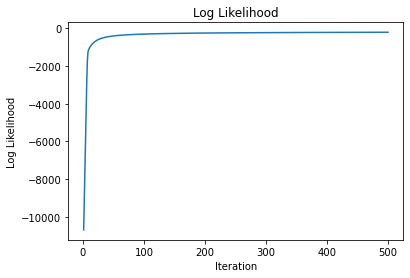

Weights in the form of an 8X8 matrix :-

[[-0.34617716 -0.65569367 -0.62125699 -0.92681646 -0.77196596 -0.02663191
   0.58493628  1.46657927]
 [ 0.10177901  0.20370297 -0.00904489  0.10615928 -0.08927346  0.23935354
  -0.44999106 -0.69342582]
 [ 1.08107691  1.01859833  1.22831035  0.31267651  0.40436647 -1.25423315
  -1.99328051 -1.2904294 ]
 [ 0.59479595  0.63140307  0.27562845 -0.01931064 -0.56601302 -0.88409676
  -0.07900004 -0.10632697]
 [ 0.60539528  0.47487458 -0.02381732 -0.11603343 -0.30020209 -0.53360873
  -0.07391531 -0.24071354]
 [ 0.6423552  -0.13435407 -0.17259834  0.52830511  0.23783596  0.14150086
   0.51461759 -0.60478732]
 [ 0.96230645 -0.23048089  0.64249679  0.13520567  0.18511928 -0.2204645
   0.41885869 -0.35616502]
 [ 0.02880699  0.25300272  0.05366539 -0.04314749  0.41243363  0.17891787
   0.11944765  0.08757724]]


In [5]:
# Part A

# Plot percent error rate
plt.plot(itrList, percentErrors)
plt.title('Percent error rate')
plt.ylabel('Percent error rate')
plt.xlabel('Iteration')
plt.savefig('PercentError.png')
plt.show()
plt.close()

# Plot log likelihood
plt.plot(itrList, logLikelihoods)
plt.title('Log Likelihood')
plt.ylabel('Log Likelihood')
plt.xlabel('Iteration')
plt.savefig('LogLikelihood.png')
plt.show()
plt.close()

# Print weight vector
print("Weights in the form of an 8X8 matrix :-\n")
print(np.reshape(model.weightVec, (8, 8)))

In [6]:
# Read test data
bitmap_test = []
label_test = []

with open('test3.txt', 'r') as f:
    bitmapLines = f.readlines()
    
    for bitmap in bitmapLines:
        bitmap_test.append(bitmap.replace(' \n', '').split(' '))
        label_test.append(0)
        
with open('test5.txt', 'r') as f:
    bitmapLines = f.readlines()
    
    for bitmap in bitmapLines:
        bitmap_test.append(bitmap.replace(' \n', '').split(' '))
        label_test.append(1)
        
bitmap_test = np.array(bitmap_test, dtype=float)
label_test = np.array(label_test, dtype=float)

In [7]:
# Part B

# Label test images and compute percent error rate
testProbs = model.LogLikelihood(bitmap_test)
predLabels = (testProbs > 0.5).astype(int)
percentError = np.sum((label_test != predLabels).astype(int))/len(label_test)*100
print('Percent error :- ', percentError)

Percent error :-  5.25
